In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras import layers

2023-08-17 19:12:49.060068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 19:12:50.079096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

2023-08-17 19:12:51.061799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:51.084068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:51.084151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = pd.read_csv('kissanime/assigned_classes.csv')

In [4]:
data

,img,0,1,2,3,4,5,6,7,8,9
0,https___kissanime.ru_Special_CapImg_a2cydTdxbT...,0,0,0,0,0,1,0,0,0,0
1,https___kissanime.ru_Special_CapImg_a2cydTdxbT...,0,0,0,0,0,0,0,1,0,0
2,https___kissanime.ru_Special_CapImg_a2cydTdxbT...,0,0,0,0,0,0,0,0,1,0
3,https___kissanime.ru_Special_CapImg_a2cydTdxbT...,0,0,0,0,0,0,0,0,0,1
4,https___kissanime.ru_Special_CapImg_a2cydTdxbT...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2291,https___kissanime.ru_Special_CapImg_ZzZLaWpzTU...,0,0,0,0,0,1,0,0,0,0
2292,https___kissanime.ru_Special_CapImg_ZzZLaWpzTU...,0,0,0,0,1,0,0,0,0,0
2293,https___kissanime.ru_Special_CapImg_ZzZLaWpzTU...,0,0,0,0,0,0,0,0,1,0
2294,https___kissanime.ru_Special_CapImg_ZzZLaWpzTU...,0,0,1,0,0,0,0,0,0,0


In [5]:
with tf.device('/CPU:0'):
    images = [tf.keras.utils.load_img(f"kissanime/{path}") for path in data.img]
    images = [tf.image.resize_with_pad(im, target_height=200, target_width=200) for im in images]
    images = [np.array(im) for im in images]
    images = np.stack(images)

2023-08-17 19:12:51.159121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:51.159360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:51.159464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:52.287518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-17 19:12:52.287828: I tensorflow/compile

In [6]:
images.shape

(2296, 200, 200, 3)

In [7]:
data = data.drop('img', axis=1)
labels = data.to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=42, test_size=0.3)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

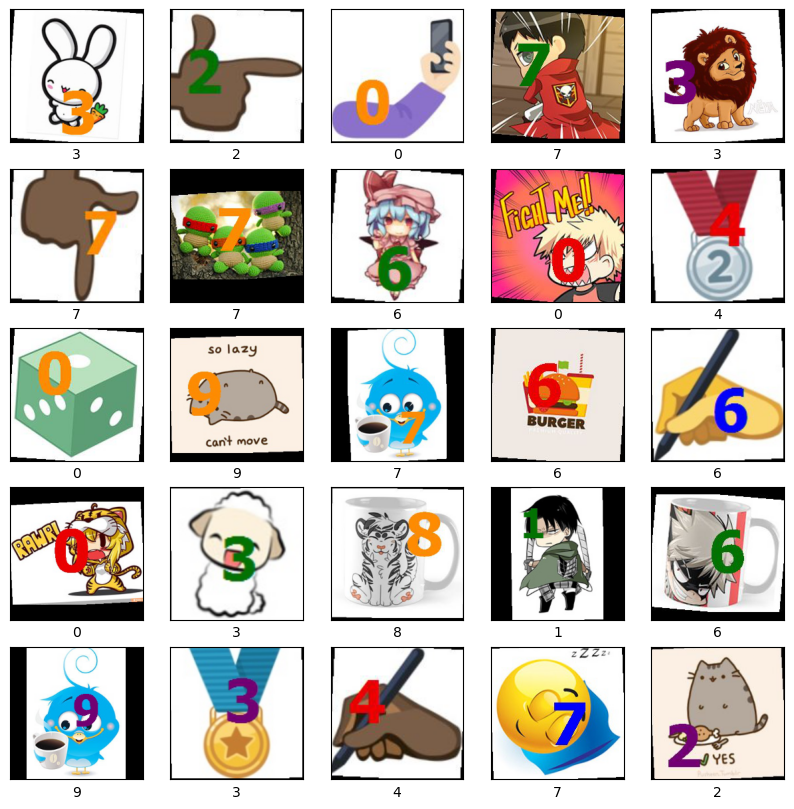

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_train[i]))
plt.show()

(array([233., 226., 229., 230., 231., 230., 223., 232., 230., 232.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

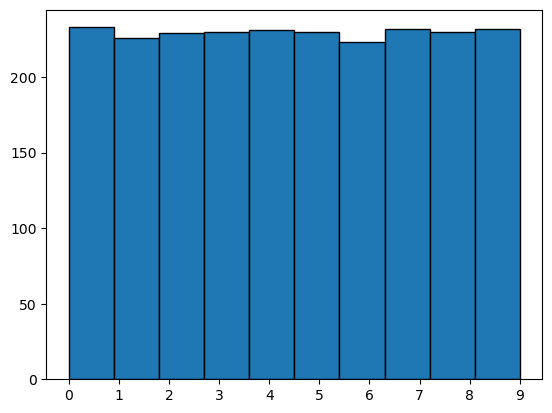

In [11]:
labels_num = list(map(lambda t: np.argmax(t), labels))
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.hist(labels_num, bins=10, edgecolor='black')

In [13]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [ ]:
epochs = 30
batch_size = 64
num_classes = 10

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test))

2023-08-17 19:13:41.257872: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 771360000 exceeds 10% of free system memory.
2023-08-17 19:13:42.088574: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 771360000 exceeds 10% of free system memory.


Epoch 1/30


2023-08-17 19:13:56.507276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-17 19:14:06.989293: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-17 19:14:08.092364: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcf5c13f820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-17 19:14:08.092453: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-08-17 19:14:08.404224: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-17 19:14:09.162867: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-17 19:14:09.319985: I ./tensorflow/compiler/jit/devic

26/26 [==============================] - 69s 1s/step - loss: 2.3054 - accuracy: 0.1045 - val_loss: 2.3095 - val_accuracy: 0.0914
Epoch 2/30
26/26 [==============================] - 10s 379ms/step - loss: 2.2989 - accuracy: 0.1120 - val_loss: 2.3063 - val_accuracy: 0.0987
Epoch 3/30
26/26 [==============================] - 2s 77ms/step - loss: 2.2827 - accuracy: 0.1220 - val_loss: 2.3069 - val_accuracy: 0.1103
Epoch 4/30
17/26 [==================>...........] - ETA: 11s - loss: 2.2820 - accuracy: 0.1296

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
model.save('model/model.keras')